In [1]:
import jax
import jax.numpy as jnp

import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("./")))))

from training import Agent
from loss import params, loss_fn, evaluate_fn
from data import generate_dataset, generate_batch_fn

import config
config.n_data = {
    "i": 100,
    "b": 100,
    "cx": 200, 
    "ct": 100,
    "dx": 20,
    "dt": 20,
}
config.batch_size = {
    "dirichlet": 400,
    "collocation": 1000,
}
config.weights = {
	"c1": 1.0,
	"c2": 1.0,
	"d1": 1.0,
	"d2": 1.0,
	"s": 1e-4,
	"l1": 1e-8,
	"l2": 1e-8,
}
config.iterations = 100000
config.print_every = 1000

datasets = generate_dataset(config.n_data["i"], config.n_data["b"], config.n_data["cx"], config.n_data["ct"], config.n_data["dx"], config.n_data["dt"])
batch_fn, evaluate_batch_fn = generate_batch_fn(config.key, config.batch_size, *datasets, config.weights)

agent = Agent(params, loss_fn, evaluate_fn, "models/{}".format(config.NAME))
agent.compile(config.optimizer, config.lr)
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/08, 15:42:11, Iteration: 1000, Train Loss: 2.9739e-01, c1: 1.2681e-02, c2: 1.4452e-03, d1: 1.9397e-02, d2: 2.6386e-01, s: 5.4763e-05, l1_reg: 3.3127e+02, l2_reg: 1.0280e+02
2020/09/08, 15:42:19, Iteration: 2000, Train Loss: 3.0663e-01, c1: 1.1617e-02, c2: 8.3266e-03, d1: 2.1819e-02, d2: 2.6486e-01, s: 2.9878e-07, l1_reg: 3.2156e+02, l2_reg: 1.0549e+02
2020/09/08, 15:42:27, Iteration: 3000, Train Loss: 2.9968e-01, c1: 1.1334e-02, c2: 1.7794e-03, d1: 2.6157e-02, d2: 2.6040e-01, s: 9.6685e-06, l1_reg: 3.0976e+02, l2_reg: 1.0906e+02
2020/09/08, 15:42:35, Iteration: 4000, Train Loss: 3.0907e-01, c1: 2.1688e-02, c2: 3.8962e-03, d1: 2.1997e-02, d2: 2.6148e-01, s: 2.2750e-07, l1_reg: 2.9698e+02, l2_reg: 1.1948e+02
2020/09/08, 15:42:43, Iteration: 5000, Train Loss: 2.8854e-01, c1: 1.1227e-02, c2: 3.7118e-03, d1: 1.7948e-02, d2: 2.5565e-01, s: 8.7250e-10, l1_reg: 2.7517e+02, l2_reg: 1.2568e+02
2020/09/08, 15:42:51, Iteration: 6000, Train Loss: 3.1190e-01, c1: 3.9622e-02, c2: 8.0724e-03, 

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2020/09/08, 15:43:31, Iteration: 11000, Train Loss: 2.7372e-01, c1: 6.4339e-02, c2: 5.3694e-02, d1: 1.3439e-02, d2: 1.4225e-01, s: 3.9461e-06, l1_reg: 1.7997e+02, l2_reg: 9.9939e+01
2020/09/08, 15:43:40, Iteration: 12000, Train Loss: 2.3997e-01, c1: 4.1575e-02, c2: 5.6014e-02, d1: 1.2266e-02, d2: 1.3011e-01, s: 2.4807e-10, l1_reg: 1.6487e+02, l2_reg: 1.0004e+02
2020/09/08, 15:43:48, Iteration: 13000, Train Loss: 2.3615e-01, c1: 4.4449e-02, c2: 5.7495e-02, d1: 1.1823e-02, d2: 1.2238e-01, s: 3.9717e-07, l1_reg: 1.6633e+02, l2_reg: 1.0138e+02
2020/09/08, 15:43:56, Iteration: 14000, Train Loss: 2.1216e-01, c1: 1.8986e-02, c2: 5.8874e-02, d1: 1.1601e-02, d2: 1.2270e-01, s: 1.0102e-09, l1_reg: 1.5605e+02, l2_reg: 1.0079e+02
2020/09/08, 15:44:03, Iteration: 15000, Train Loss: 2.2554e-01, c1: 2.9639e-02, c2: 5.7512e-02, d1: 1.1389e-02, d2: 1.2699e-01, s: 3.1583e-06, l1_reg: 2.4090e+02, l2_reg: 1.1281e+02
2020/09/08, 15:44:12, Iteration: 16000, Train Loss: 2.8801e-01, c1: 9.1719e-02, c2: 6.0193

2020/09/08, 15:49:54, Iteration: 57000, Train Loss: 1.7495e-01, c1: 7.8911e-02, c2: 4.0434e-02, d1: 8.3945e-03, d2: 4.7210e-02, s: 2.0756e-06, l1_reg: 2.3798e+02, l2_reg: 1.8011e+02
2020/09/08, 15:50:02, Iteration: 58000, Train Loss: 1.8126e-01, c1: 8.2005e-02, c2: 4.1109e-02, d1: 8.7175e-03, d2: 4.9428e-02, s: 3.3209e-09, l1_reg: 2.1925e+02, l2_reg: 1.7926e+02
2020/09/08, 15:50:10, Iteration: 59000, Train Loss: 1.5341e-01, c1: 5.6714e-02, c2: 4.1066e-02, d1: 9.1262e-03, d2: 4.6502e-02, s: 1.8484e-10, l1_reg: 2.1119e+02, l2_reg: 1.7962e+02
2020/09/08, 15:50:18, Iteration: 60000, Train Loss: 1.4743e-01, c1: 5.5809e-02, c2: 3.6933e-02, d1: 7.0170e-03, d2: 4.7670e-02, s: 1.2403e-07, l1_reg: 2.0117e+02, l2_reg: 1.7951e+02
2020/09/08, 15:50:26, Iteration: 61000, Train Loss: 1.5719e-01, c1: 6.9524e-02, c2: 4.0219e-02, d1: 6.6088e-03, d2: 4.0830e-02, s: 3.3208e-10, l1_reg: 2.0161e+02, l2_reg: 1.8155e+02
2020/09/08, 15:50:34, Iteration: 62000, Train Loss: 1.6063e-01, c1: 6.8798e-02, c2: 4.2878

<IPython.core.display.Javascript object>


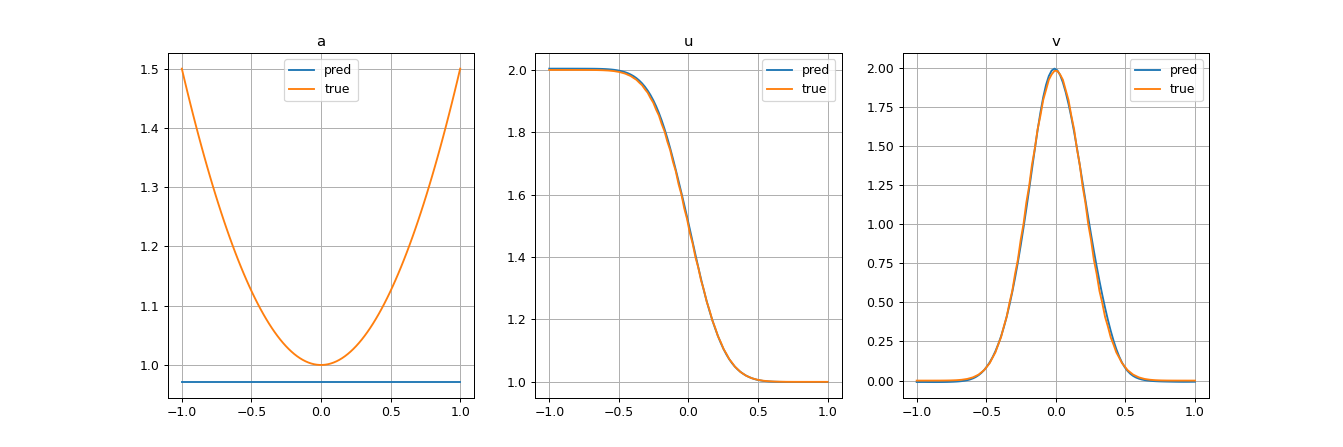

In [3]:
from loss import inverse_model, direct_model
from data import domain
import jax.numpy as jnp
import numpy as np

inverse_params = agent.params[1]
x_test = jnp.linspace(*domain[:, 0], 100).reshape((-1, 1))
a_fn = lambda x: 1+0.5*x**2
a_pred = inverse_model(inverse_params, x_test)
a_true = a_fn(x_test)

direct_params = agent.params[0]
t_test = domain[1, 1]*jnp.ones_like(x_test)
uv_pred = direct_model(direct_params, jnp.hstack([x_test, t_test]))

from scipy.io import loadmat
data_true = loadmat("problem2_3_snapshot_epsilon_1e-12.mat")
u_true, v_true = data_true["u_snapshots"][:, -1], data_true["v_snapshots"][:, -1]

import matplotlib.pyplot as plt
%matplotlib notebook

f, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].plot(x_test, a_pred, label = "pred")
ax[0].plot(x_test, a_true, label = "true")
ax[0].set_title("a")
ax[1].plot(x_test, uv_pred[:, 0:1], label = "pred")
ax[1].plot(x_test, u_true, label = "true")
ax[1].set_title("u")
ax[2].plot(x_test, uv_pred[:, 1:2], label = "pred")
ax[2].plot(x_test, v_true, label = "true")
ax[2].set_title("v")
for ax_ in ax:
	ax_.legend()
	ax_.grid()
plt.show()